In [1]:
from datetime import datetime, timedelta
from swmfpy.web import get_omni_data
import matplotlib.dates as mdates
from matplotlib import dates
import matplotlib.pyplot as plt

start_time = datetime(year = 2013, month = 1, day = 1)
end_time   = datetime(year = 2014, month = 1, day =1)
data       = get_omni_data(start_time,end_time)
data.keys()


KeyboardInterrupt: 

In [ ]:
print(data['times'][0:15])
#print(data['sym_h'])
plt.plot(data['times'],data['sym_h'],color ='tab:blue')
plt.plot()
import numpy as np
def Look_Min(data):
    '''Done by Antonio
    _______________
    This is the function that would select the minimum of the data provided
    _______________
    
    
    ''' 
    Min = np.nanmin(data['sym_h'])                  # Numpy function that ignores nan values and looks for the min in a range
    print(Min)                                      # This is just for trial
    for i in range(len(data['sym_h'])):             # Indexing the data
        if data['sym_h'][i] == Min:                 # When the data is equal to the min, it does something
            print(data['times'][i])                 # This is for trial
            Time_of_min = data['times'][i]          # This is the time of the minimum
    return Min, Time_of_min                         #Function returns the min value found and the time of the min
Look_Min(data)

def Save_Storm_Min(data):
    """Done by Antonio
    
    This should be the function that stores the minimum and datetime of the minimum
    
    INPUT  : data
    OUTPUT : dictionary with date of the min and the min value
    """ 
    return Look_Min(data)[0] , Look_Min(data)[1]
def Time_Gap(start_time):
    """Done by Antonio
    
    This should be the function that calculates the time gap betweeen storms
    INPUT : start_time = list of <datetime.datetime>
    OUTPUT: time_gap   = list of <datetime.timedelta>
    """ 
    time_gap = []
    for index in range(len(start_time)):
        time_gap.append(start_time[i]-start_time[i-1])
    return time_gap
    

## Task 4: Analysis of the year 
Study the storm activity of the whole year. Identify minimum and maximum storm intensity, notifying the week of occurrence; the maximum and minimum time gap in between storms, notifying the relative week. Then, create a graph that compares the "numbers of storms in a week" vs "sum of the intensity of the storms in a week". 


In [ ]:
from datetime import datetime, timedelta
from swmfpy.web import get_omni_data
import matplotlib.dates as mdates
from matplotlib import dates
import matplotlib.pyplot as plt
def Download_Data_omni(start_time,end_time):
    '''
    This is the donwload data function
    __________________________________________
    Both dates should be in datetime format
    '''
    data       = get_omni_data(start_time,end_time)
    return data



In [ ]:
"""
how many storms went below -100nT in 2003?
"""

__author__ = 'Emily DeBoer'
__email__ = 'edeboer@ucsd.edu'

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

def read_ascii_file(filename,index, margin):
    ''' reading an ascii file
    INPUT
        filename: directory + filename of file (string)
        index: column where the data is
        margin: 
    OUTPUT
        a dictionary with two key terms "times" and "data"
    
    '''

    with open(filename) as file:
            
        # instantiating variables
        year = []
        day = []
        hour = []
        minute = []
        data = []
        times = []
        
        for line in file:
            temp = line.split() # putting each line in list
            year.append(int(temp[0])) # 1st index is year
            day.append(int(temp[1])) # 2nd index is day
            hour.append(int(temp[2])) # 3rd index is hour
            minute.append(int(temp[3])) # 4th index is minute
            data.append(float(temp[index])) # index of data
     
            # setting the date correctly
            # Omni web has days as absolute (so 75 days = March 16th)
            # first part sets the date to Jan 1, then it adds the months, 
            # calculated with time delta
            datetime1 = dt.datetime(int(temp[0]), 1, 1, int(temp[2]), int(temp[3])) + dt.timedelta(days=int(temp[1])-1, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
            times.append(datetime1) # puts dates into the list
            
        # original data WITHOUT filter
        original_diction = {'times': times, 'data': data}
        
        time_array = np.array(original_diction['times']) # time into an array
        data_array = np.array(original_diction['data']) # data into an array
        mask_below_margin = (data_array <= margin) # boolean array for below margin
        mask_at_margin = (data_array == margin) # boolean array at margin
        print(mask_at_margin)
        print(sum(mask_at_margin))
        
        # storm start and end is when it passes margin and then comes back up again
        # this is the sum of all the marginal elements divided by two
        time_select = time_array[mask_below_margin] # times under margin
        data_select = data_array[mask_below_margin] # data under margin

        count_of_storms = 1
        
        index_start = []
        index_end = []
        loop = 0
        
        print('time array length', time_array.shape)
        print('Mask below margin length', len(mask_below_margin))
        print('time_array length', len(time_array))
        for i in range(len(mask_below_margin)-1): 
            loop = loop + 1
            if mask_below_margin[i] == False and mask_below_margin[i+1] == True:
                index_start.append(i) # getting all the start times of storms
            if mask_below_margin[i] == True and mask_below_margin[i+1] == False:
                index_end.append(i) # this is going to get all the end times of storms
        
        # print('index length', len(index_start))
        # print(' number of loops', loop)
        print(' start index length', len(index_start))
        print(' end index length', len(index_end))
        # print(time_array[87424])
       
        hours = 12
        delta = dt.timedelta(0, 0, 0, 0, 0, hours)
        
        for x in range(len(index_start)-2):
            # print(x)
            # print(index_end[x])
            
            print('end   ',time_array[index_end[x]])
            print('start ', time_array[index_start[x+1]])
            if time_array[index_end[x]] < (time_array[index_start[x+1]]-delta):
                # print('end   ',time_array[index_end[x]])
                # print('start ', time_array[index_start[x+1]])

                count_of_storms = count_of_storms + 1
                
        # print('15 end   ',time_array[index_end[15]])
        # print('15 start ', time_array[index_start[15+1]])
        # print('16 end   ',time_array[index_end[16]])
        # print('16 start ', time_array[index_start[16+1]])

        # dictionary with both select time and data        
        select_diction = {'times': time_select, 'data': data_select}
            
    return original_diction, select_diction, count_of_storms

# only will run if in main body of code
if __name__ == "__main__":

    dir = 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/day_02/' #folder for files
    filename =  dir + 'omni2_DST_2003.lst' # file name
    index = -1 # data column
    margin = -300 # threshold
    
    original, select, count = read_ascii_file(filename,index, margin) # call function
    
    
    # plt.plot(original['times'], original['data'], 'cadetblue') # plot all data
    plt.plot(select['times'], select['data'], 'red') # plot storm data
    plt.xticks(rotation=45) # <-- makes the x axis diagonal
    plt.xlabel('Time (UTC)') # labeling
    plt.ylabel('SYM/H (nT)') #labeling
    plt.title('Geomagnetic Storm on 3/17/2013') 

    # print number of storm data
    print('Number of Storms below', margin, 'with 12 hours between them:', count)
    # print('Number of storms that occured below -100 SYM/H:', int(count))

In [1]:
from Project3 import plot_function , functions_emily
save_path = 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3/trimmed'
year = 2013
week_number = 2

data = functions_emily.downloadsdata(year)  ### THIS WORKS

for week_number in range(1,53):

    data_selected_week = functions_emily.selectweek(data, week_number)

    amount_of_storms_in_week  = functions_emily.countstorm(data_selected_week[0])
    #print(amount_of_storms_in_week)
    amount_of_storms_in_data  = functions_emily.countstorm(data)
    #print(amount_of_storms_in_data)
    #print(type(data_selected_week[0]['sym_h']))
    #print(data_selected_week[0]['sym_h'])


    symh_index = data['sym_h']
    symh_index_trimmed = data_selected_week[0]['sym_h']

    al_index = data['al'][:]
    al_index_trimmed = data_selected_week[0]['al']

    time_index = data['times']
    time_index_trimmed = data_selected_week[0]['times']

    plot_function.plot_and_save(symh_index_trimmed,al_index_trimmed, time_index_trimmed, save_path,week_number)



Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed1
Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed2
Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed3
Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed4
Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed5
Number of Storms with 12 hours between them: 0
Number of Storms w

Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed45
Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed46
Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed47
Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed48
Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\Project3\trimmed49
Number of Storms with 12 hours between them: 0
Number of Storms with 12 hours between them: 3
Plot saved to

In [5]:
import imageio
import cv2
import numpy as np
import glob
print(glob.glob('C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3/'+str('*.png')))
path = 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3/'
#path = 'C:/Users/u0142106/Desktop/Barcelona_Project/Good_runs/2000_1000/Shock/Plots/'
frames = []
for filename in glob.glob(path+str('*.png')):
    image = imageio.imread(filename)
    frames.append(image)
imageio.mimsave(path+str('/example.gif'), # output gif
                frames,          # array of input frames
                fps = 15)         # optional: frames per second

['C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed1.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed10.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed11.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed12.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed13.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed14.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed15.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed16.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed17.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed18.png', 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Project3\\trimmed19.png', 'C:/Users/u0142106/Desktop/Space

In [7]:
from datetime import datetime, timedelta
from swmfpy.web import get_omni_data
import matplotlib.dates as mdates
from matplotlib import dates
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt


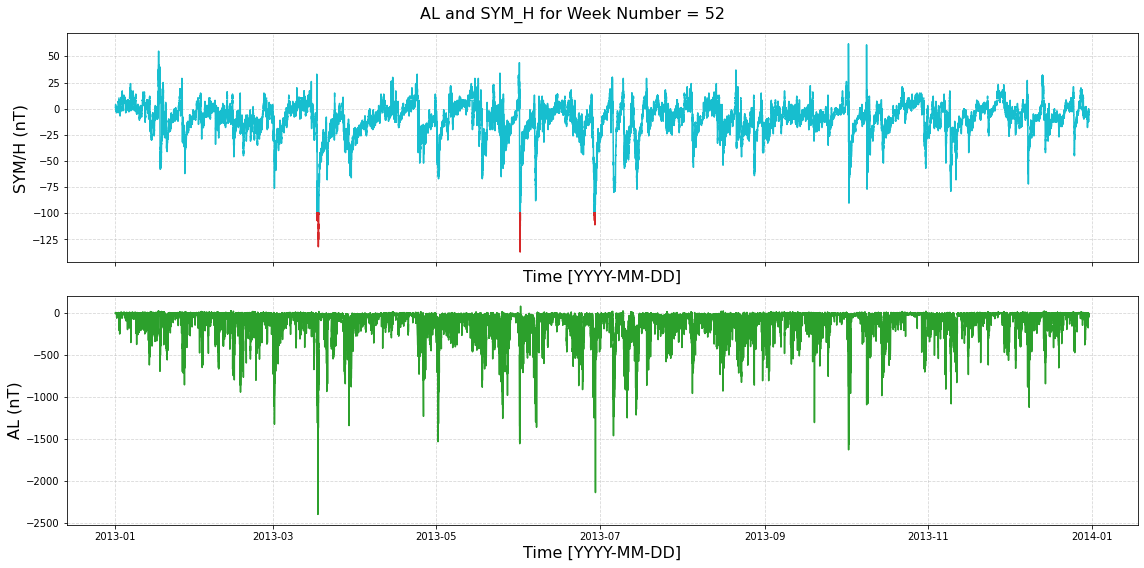

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True,facecolor = 'white')
#plotting
axs[0].plot(time_index, np.ma.masked_where(symh_index < -100, symh_index), color='tab:cyan', label='SYM_H')
axs[0].plot(time_index, np.ma.masked_where(symh_index > -100, symh_index), color='tab:red', label='SYM_H')
axs[0].set_ylabel('SYM/H (nT)', fontsize=16)
axs[0].set_xlabel('Time [YYYY-MM-DD]', fontsize=16)
#    axs[0].legend(fontsize=13)
axs[0].grid(True, linestyle='--', alpha=0.5)
#axs[0].set_xlim(x_min, x_max)
#    axs[0].xaxis.set_major_locator(mdates.dayLocator())
#    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
#    axs[0].set_title(fontsize = 15)

axs[1].plot(time_index, al_index, color='tab:green', label='AL')
axs[1].set_ylabel('AL (nT)', fontsize=16)
#    axs[1].set_xlabel('{}'.format(time_index), fontsize=16)
axs[1].set_xlabel('Time [YYYY-MM-DD]', fontsize=16)
#    axs[1].legend(fontsize=10)
axs[1].grid(True, linestyle='--', alpha=0.5)
#axs[1].set_xlim(x_min, x_max)
#    axs[1].xaxis.set_major_locator(mdates.dayLocator())
#    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
#    axs[1].set_title(fontsize = 15)

plt.suptitle('AL and SYM_H for Week Number = '+str(week_number), fontsize=16)
plt.tight_layout()
#save_path = "/Users/shreejankhanal/Documents/SWSS_Project/symh_al_plot.png"


#plt.savefig(save_path, bbox_inches='tight')
#plt.close()
#print(f"Plot saved to {os.path.abspath(save_path)}")
plt.show()